In [8]:
from bertopic import BERTopic
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import random
import numpy as np
from bertopic import BERTopic
from hdbscan import HDBSCAN

In [9]:
df = pd.read_csv("/Users/vishalsehgal/Desktop/NLP/Assignment-1/Dataset/assignment-2-data.csv")

nvidia_articles = df[df['clean_content'].str.contains("nvidia", case=False, na=False)]['clean_content'].tolist()

# 1st Iteration

In [10]:
import numpy as np
import random
import torch
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from umap import UMAP
from hdbscan import HDBSCAN
import os

# Set random seeds for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
torch.manual_seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

# UMAP configuration for reproducibility
umap_model = UMAP(
    random_state=SEED,
    n_neighbors=15,
    min_dist=0.1,
    metric="cosine",
    n_jobs=1
)

# HDBSCAN configuration for reproducibility
hdbscan_model = HDBSCAN(
    min_cluster_size=10,
    min_samples=10,
    prediction_data=True,
    approx_min_span_tree=False,
    core_dist_n_jobs=1
)

# Set up CountVectorizer
vectorizer_model = CountVectorizer(lowercase=True)

# Initialize BERTopic without fixed nr_topics to allow natural topic count
bert_topic = BERTopic(
    vectorizer_model=vectorizer_model,
    min_topic_size=10,
    calculate_probabilities=True,
    embedding_model="all-MiniLM-L6-v2",
    umap_model=umap_model,
    hdbscan_model=hdbscan_model
)

# Re-seed before fit_transform
np.random.seed(SEED)
random.seed(SEED)
torch.manual_seed(SEED)

# Fit and transform data
topic_assigned_to_doc, probabilities = bert_topic.fit_transform(nvidia_articles)

# Retrieve initial topic count
initial_topic_count = bert_topic.get_topic_freq().shape[0] - 1  # Exclude -1 (outliers)

# Reduce topics only if significantly above target
target_nr_topics = 60
if initial_topic_count > target_nr_topics:
    bert_topic.reduce_topics(nvidia_articles, nr_topics=target_nr_topics)

# Retrieve and display topics
topic_matrix = bert_topic.get_topic_info()
for topic_id in topic_matrix['Topic']:
    if topic_id != -1:  # Ignore the -1 topic (outliers)
        print(f"Topic {topic_id}:")
        print(bert_topic.get_topic(topic_id))


Topic 0:
[('million', 0.023715019868909008), ('quarter', 0.022174213579705605), ('year', 0.01913483667309698), ('revenue', 0.019119997295380005), ('zacks', 0.01658252943215118), ('company', 0.0162650353896624), ('cent', 0.012967330641718747), ('rank', 0.012686737322500773), ('consensus', 0.012614959118743933), ('earnings', 0.01216444018030526)]
Topic 1:
[('amd', 0.06648051252337077), ('graphic', 0.02490345318267687), ('radeon', 0.023750654042430104), ('processor', 0.023070440742256924), ('gpu', 0.019340631148884183), ('ryzen', 0.018837502812469327), ('epyc', 0.016446617010257715), ('year', 0.015575105976734975), ('revenue', 0.014152314544202337), ('card', 0.013617960364400364)]
Topic 2:
[('nvidia', 0.030526409824141024), ('nvda', 0.015470702138198053), ('gaming', 0.014493230547864003), ('share', 0.01234473295020449), ('year', 0.011765787494306392), ('stock', 0.011522236193219997), ('company', 0.011344438787667511), ('analyst', 0.01104560897675967), ('chip', 0.010923551781912413), ('est

Here are possible labels for each topic based on the terms provided:

1. **Quarterly Earnings and Revenue**
2. **AMD Graphics and Processors**
3. **Nvidia Stock and Analyst Estimates**
4. **Nvidia Stock Trading Volume and Price Movements**
5. **Self-Driving Vehicles and Autonomous Technology**
6. **Stock Market Performance and Trends**
7. **Analyst Target Prices and Ratings**
8. **Tech Funds and ETFs**
9. **Intel and AI Technologies**
10. **Analyst Reports and Research**
11. **Market Indices and Currencies**
12. **Stock Price Resistance and Trends**
13. **Apple Financials and Market Position**
14. **Stock Market Indices and Movements**
15. **Nvidia Gaming and Revenue**
16. **Autonomous Driving Technology**
17. **U.S.-China Trade and Market Influence**
18. **AI, Nvidia, and Cloud Computing**
19. **Semiconductor Industry and Earnings**
20. **Earnings Growth and Investment Analysis**
21. **Oil Prices and Market Trends**
22. **Stock Market Trading and Investing**
23. **China-U.S. Trade Tensions**
24. **Gaming and Esports Market**
25. **Nvidia Stock Trading Details**
26. **Micron Memory and Semiconductor Market**
27. **Nvidia Stock and Trading Volume**
28. **Intel and Processor Industry**
29. **Social Media Advertising (Facebook, Snapchat, etc.)**
30. **Oil and Financial Market Indicators**
31. **Stock Market Trading Metrics**
32. **Cryptocurrency and Blockchain**
33. **Financial Futures and Trade Movements**
34. **Corporate Stocks and Financial Metrics**
35. **Qualcomm and Antitrust Issues**
36. **GAAP and Gaming Revenue**
37. **Semiconductor Industry Analysis**
38. **Investment Reports and Earnings**
39. **Steel Industry and Trade Tariffs**
40. **Trader Strategies and Market Analysis**
41. **Nvidia Stock Highs and Lows**
42. **Stock Market Performance**
43. **Nvidia RTX and Ray Tracing**
44. **Qualcomm and Chip Market**
45. **China Semiconductor Industry**
46. **SoftBank Vision Fund Investments**
47. **Mellanox and Data Networking Solutions**
48. **Stock Market Podcast and Analysis**
49. **Digital Storage Industry**
50. **Nvidia PEG Ratio and Value**
51. **Market Predictions and Investor Outlook**
52. **Storage Solutions and Flash Technology**
53. **Market Trends and Federal Policy**
54. **Shanghai Market and Stock Resistance Levels**
55. **Baidu Autonomous Driving Platform**
56. **Coronavirus Pandemic and Health**
57. **Earnings Reports and Analyst Forecasts**
58. **Blockchain ETFs and Investment Funds**

These labels summarize the primary themes or focus areas identified in each topic.

# For 2nd Iteration 

For this iteration: I did pre-processing steps. 

In [11]:
import pandas as pd
import numpy as np
import random
import torch
import re
import nltk
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from umap import UMAP
from hdbscan import HDBSCAN
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure nltk components are downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Load data
df = pd.read_csv("/Users/vishalsehgal/Desktop/NLP/Assignment-1/Dataset/assignment-2-data.csv")

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
torch.manual_seed(42)

# Define preprocessing function
def preprocess_text(doc):
    doc = re.sub(r'\W', ' ', str(doc))
    doc = doc.lower()
    doc = re.sub(r'\s+[a-z]\s+', ' ', doc)
    tokens = nltk.word_tokenize(doc)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to Nvidia-related articles
nvidia_articles = [
    preprocess_text(doc) for doc in df[df['clean_content'].str.contains("nvidia", case=False, na=False)]['clean_content'].tolist()
]

# UMAP configuration for stable embeddings with random_state set, disabling parallelization for more determinism
umap_model = UMAP(
    random_state=42,
    n_neighbors=30,
    min_dist=0.1,
    metric="cosine",
    n_components=2,      # Default to 2 for consistency
    n_jobs=1             # Disabling parallel processing
)

# Adjusted HDBSCAN parameters with random_state equivalent, also set core_dist_n_jobs=1 for single-threaded execution
hdbscan_model = HDBSCAN(
    min_cluster_size=10,
    min_samples=5,
    prediction_data=True,
    approx_min_span_tree=False,
    core_dist_n_jobs=1     # Disabling parallel processing
)

# Set up the CountVectorizer with limited vocabulary and random state
vectorizer_model = CountVectorizer(lowercase=True, max_features=5000)

# Initialize BERTopic with controlled nr_topics
bert_topic = BERTopic(
    vectorizer_model=vectorizer_model,
    nr_topics=60,
    min_topic_size=15,
    calculate_probabilities=True,
    embedding_model=umap_model,
    hdbscan_model=hdbscan_model
)

# Train the model on the data and transform it into topics
topic_assigned_to_doc, probabilities = bert_topic.fit_transform(nvidia_articles)

# Check the actual number of topics generated
available_topics = bert_topic.get_topic_freq().shape[0] - 1  # exclude outlier topic (-1)
target_nr_topics = min(60, available_topics)

# Retrieve and display topics
topic_matrix = bert_topic.get_topic_info()
for topic_id in topic_matrix['Topic']:
    if topic_id != -1:  # Ignore the -1 topic (outliers)
        print(f"Topic {topic_id}:")
        print(bert_topic.get_topic(topic_id))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vishalsehgal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vishalsehgal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vishalsehgal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Topic 0:
[('million', 0.02966199574456451), ('quarter', 0.02693957868388872), ('revenue', 0.022145617299824196), ('year', 0.021840799948228854), ('zacks', 0.019671443338124057), ('company', 0.01789812376755614), ('cent', 0.017446803504146482), ('consensus', 0.015576391029041098), ('earnings', 0.01530573901096724), ('rank', 0.015017993617519558)]
Topic 1:
[('traded', 0.30738476915075585), ('seven', 0.1396582979779385), ('gmt', 0.13903091743665513), ('lowest', 0.13606104962473545), ('highest', 0.12519764049056376), ('day', 0.12517653935620413), ('nvidia', 0.1226576688095505), ('exchange', 0.11659473717288378), ('volume', 0.11349477515252596), ('session', 0.10766326931275087)]
Topic 2:
[('nvidia', 0.027525263304181213), ('gaming', 0.020630087041384047), ('quarter', 0.017587746929725243), ('year', 0.016856316411036344), ('revenue', 0.016293982987784582), ('billion', 0.014913970325720184), ('gpu', 0.013482636098110654), ('million', 0.01247068360804109), ('fiscal', 0.012466304869602873), ('c

Here are suggested labels for each topic based on the given terms:

1. **Quarterly Financials and Revenue**
2. **Nvidia Stock Trading Volume and Movements**
3. **AMD Processors and Graphics Cards**
4. **Stock Resistance and Market Trends**
5. **U.S. Market Indices and Economic Events**
6. **U.S.-China Trade Relations and Market Impact**
7. **Nvidia Stock and Investor Sentiments**
8. **Analyst Ratings and Price Targets**
9. **Top Market Performers and Closures**
10. **Investment Podcasts and Market Analysis**
11. **Apple Products and Revenue**
12. **Semiconductor ETFs and Earnings**
13. **AI, Nvidia, and Cloud Computing**
14. **Nvidia Financials and Gaming Revenue**
15. **Micron and Memory Chip Market**
16. **Currency and Market Trends**
17. **Self-Driving Vehicles and Autonomous Technology**
18. **China-U.S. Trade and Technology**
19. **Intel Processors and Data Centers**
20. **Autonomous Vehicles and Market Players**
21. **Gaming and Esports Industry**
22. **Walmart and Retailer Performance**
23. **Trader Insights and Portfolio Management**
24. **Technology ETFs and Stock Sectors**
25. **Oil Prices and Energy Market**
26. **Semiconductor Industry and China Relations**
27. **Intel and AI Technology Developments**
28. **Oil Market Scenarios and Financial Metrics**
29. **Nvidia RTX and Ray Tracing Graphics**
30. **Market Predictions and Fed Impact**
31. **Stock Market Indicators and Trends**
32. **Social Media Advertising and Platforms**
33. **Corporate Stocks and Trading Movements**
34. **Earnings Reports and Financial Highlights**
35. **Cryptocurrency and Blockchain Technology**
36. **Intel Processors and PC Market**
37. **Qualcomm and Antitrust Issues**
38. **Big Tech Companies and Smart Devices**
39. **Autonomous Driving and Mobileye**
40. **Market Indices and Highs**
41. **Stock Growth and Earnings Projections**
42. **Stock Market Pre-Market Activity**
43. **EPS and Revenue Analysis**
44. **Qualcomm and Chip Industry**
45. **Samsung and Semiconductor Industry**
46. **Fed Rates and Economic Performance**
47. **AI, Machine Learning, and Robotics**
48. **Storage Solutions and Cloud Technology**
49. **Electronic Design and Verification (Cadence)**
50. **Nasdaq and Tech Stocks**
51. **Baidu Autonomous Driving Platform**
52. **Mellanox and Data Networking Solutions**
53. **Quarterly Earnings and Index Analysis**
54. **AI and Robotics ETFs**
55. **Digital Storage Industry (Western Digital)**
56. **Etsy and Quarterly Earnings**
57. **Blockchain ETFs and Digital Technology**
58. **Coronavirus Pandemic and Health Impacts**

These labels aim to encapsulate each topic's focus based on the prominent keywords.

# 3rd Iteration

added custom stop words used tfidf to imrpove word weighting 

In [16]:
import pandas as pd
import numpy as np
import random
import torch
import re
import nltk
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from umap import UMAP
from hdbscan import HDBSCAN
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Ensure nltk components are downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define custom stop words
custom_stop_words = [
    "Quarter", "Week", "Today", "Period", "Session", "Billion", "Million", "Percent", "Index",
    "Investment", "Earnings", "Revenue", "Growth", "Rate", "High", "Volume", "Stock", "Target",
    "Price", "Analyst", "Market", "Fund", "Asset", "Allocation", "Solution", "Client", "Report",
    "Forecast", "Record", "Technology", "Industry", "System", "Platform", "Device", "Company",
    "Digital", "Sector","day","seven","one","said"
] + list(stop_words)

# Load data
df = pd.read_csv("/Users/vishalsehgal/Desktop/NLP/Assignment-1/Dataset/assignment-2-data.csv")

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
torch.manual_seed(42)

# Define preprocessing function
def preprocess_text(doc):
    doc = re.sub(r'\W', ' ', str(doc))
    doc = doc.lower()
    doc = re.sub(r'\s+[a-z]\s+', ' ', doc)
    tokens = nltk.word_tokenize(doc)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in custom_stop_words]
    return ' '.join(tokens)

# Apply preprocessing to Nvidia-related articles
nvidia_articles = [
    preprocess_text(doc) for doc in df[df['clean_content'].str.contains("nvidia", case=False, na=False)]['clean_content'].tolist()
]

# UMAP configuration for stable embeddings with random_state set, disabling parallelization for more determinism
umap_model = UMAP(
    random_state=42,
    n_neighbors=30,
    min_dist=0.1,
    metric="cosine",
    n_components=2,      # Default to 2 for consistency
    n_jobs=1             # Disabling parallel processing
)

# Adjusted HDBSCAN parameters with random_state equivalent, also set core_dist_n_jobs=1 for single-threaded execution
hdbscan_model = HDBSCAN(
    min_cluster_size=10,
    min_samples=5,
    prediction_data=True,
    approx_min_span_tree=False,
    core_dist_n_jobs=1     # Disabling parallel processing
)

# Set up the CountVectorizer with limited vocabulary and random state
vectorizer_model = CountVectorizer(lowercase=True, max_features=5000)

# Initialize BERTopic with controlled nr_topics
bert_topic = BERTopic(
    vectorizer_model=vectorizer_model,
    nr_topics=60,
    min_topic_size=15,
    calculate_probabilities=True,
    embedding_model=umap_model,
    hdbscan_model=hdbscan_model
)

# Train the model on the data and transform it into topics
topic_assigned_to_doc, probabilities = bert_topic.fit_transform(nvidia_articles)

# Check the actual number of topics generated
available_topics = bert_topic.get_topic_freq().shape[0] - 1  # exclude outlier topic (-1)
target_nr_topics = min(60, available_topics)

# Retrieve and display topics
topic_matrix = bert_topic.get_topic_info()
for topic_id in topic_matrix['Topic']:
    if topic_id != -1:  # Ignore the -1 topic (outliers)
        print(f"Topic {topic_id}:")
        print(bert_topic.get_topic(topic_id))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vishalsehgal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vishalsehgal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vishalsehgal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Topic 0:
[('million', 0.029804480238679636), ('quarter', 0.027451465721885577), ('revenue', 0.023252792691082047), ('year', 0.0225883235830858), ('zacks', 0.019089935797179988), ('company', 0.017118253571024224), ('cent', 0.016951301095845417), ('consensus', 0.015395833436857307), ('earnings', 0.01499112244195061), ('estimate', 0.014779113856201625)]
Topic 1:
[('traded', 0.34174341268332964), ('gmt', 0.15467737274062993), ('lowest', 0.15136654947139136), ('highest', 0.13925642230374666), ('nvidia', 0.13603139707394832), ('exchange', 0.1296668558545527), ('volume', 0.12617271197213506), ('session', 0.11971182040686025), ('start', 0.11791889986878304), ('investing', 0.11384040208776863)]
Topic 2:
[('nvidia', 0.02881343821230097), ('gaming', 0.01947364826876327), ('quarter', 0.01738552271153218), ('revenue', 0.01626721813254349), ('year', 0.016117800792163912), ('billion', 0.0154636506689009), ('estimate', 0.013376432460616799), ('fiscal', 0.01317116016257099), ('nvda', 0.0130623740258278

Here are suggested labels for each topic:

1. **Company Revenue and Earnings Overview**
2. **NVIDIA Stock Trading and Market Performance**
3. **NVIDIA Gaming and Revenue**
4. **Stock Market Indices and Trade Impact**
5. **AMD Processors and Graphics Cards**
6. **Analyst Reports and Growth Projections**
7. **Autonomous Vehicles and Self-Driving Technology**
8. **Technology Funds and ETFs**
9. **Market Performance and Stock Indices**
10. **Apple and Tech Sector Insights**
11. **Stock Resistance and Support Levels**
12. **Investment Podcasts and Stock Insights**
13. **US-China Trade Relations**
14. **NVIDIA Stock Target and Analyst Ratings**
15. **Semiconductors and Industry Performance**
16. **Self-Driving Cars and Automotive Technology**
17. **AI and Cloud Computing**
18. **Earnings Reports and Financial Projections**
19. **Gaming and Streaming Services**
20. **NVIDIA Gaming Graphics and Ray Tracing**
21. **Oil Prices and Energy Market**
22. **Micron and Memory Chips**
23. **Trader Portfolios and Market Strategies**
24. **Semiconductor Industry in China**
25. **Corporate Stocks and Market Performance**
26. **Intel Processor and Technology Developments**
27. **Commodity Market and Technical Analysis**
28. **Social Media Advertising and Platform Insights**
29. **Bitcoin and Digital Currency**
30. **Intel PC Processors and Data Solutions**
31. **Qualcomm and Patent Litigation**
32. **AI and Robotics Technology**
33. **Treasury Yields and Economic Indicators**
34. **Market Predictions and Investor Sentiment**
35. **Stock Market Pre- and Post-Market Reports**
36. **Investment Podcasts and Strategy**
37. **Market Indices and Percentage Movements**
38. **Electronic Design and Verification Solutions**
39. **Earnings and Revenue Projections**
40. **Qualcomm and 5G Technology**
41. **NVIDIA Stock Ratings and Cycles**
42. **Tech Stock Performance and Index Trends**
43. **Stock Valuation Ratios and Industry Metrics**
44. **Mellanox and Data Center Solutions**
45. **Tesla and Executive News**
46. **Cloud Storage and Data Management**
47. **Samsung and Semiconductor Manufacturing**
48. **Baidu and Autonomous Driving in China**
49. **Texas Instruments and Analog Components**
50. **Intel AI Chips and Research Initiatives**
51. **Microsoft, Google, and Cloud Services**
52. **COVID-19 Pandemic and Global Health**
53. **Federal Reserve and Interest Rates**
54. **Microchip Technology and Quarterly Reports**
55. **Blockchain and Digital Asset ETFs**
56. **Western Digital and Data Storage**
57. **SoftBank Vision Fund and Investments**
58. **Political News and FBI Investigation**

These labels capture the essence of each topic and can serve as a guide for further analysis or classification.

Do the topics contain typos, or meaningless words?

In [13]:
from nltk.corpus import words
from nltk.corpus import stopwords
import re
from collections import Counter

# Use NLTK's words corpus as a reference dictionary
dictionary_words = set(words.words())
stop_words = set(stopwords.words("english"))

# Extract words from topics, using a Counter for frequency analysis
all_words = [word for doc in nvidia_articles for word in doc.split()]
word_freq = Counter(all_words)

# Define criteria for potential typos or meaningless words
def is_potential_typo(word, frequency):
    # Conditions for flagging a word as a typo or meaningless
    return (
        frequency <= 2 or  # Low frequency
        len(word) <= 2 or  # Short length
        word not in dictionary_words  # Not in dictionary
    )

# Gather potential typos and missing words into typo_miss
typo_miss = [
    (word, freq) for word, freq in word_freq.items()
    if is_potential_typo(word, freq) and word not in stop_words
]

# Display typo_miss directly in a list format
print("Potential Typos or Missing Words (Word - Frequency):\n")
for word, freq in typo_miss:
    print(f"{word} - {freq}")


Potential Typos or Missing Words (Word - Frequency):

ecb - 44
euro - 205
pip - 2
draghi - 21
bunds - 5
bps - 487
sends - 26
december - 454
nyse - 5347
noting - 59
russell - 125
iwm - 26
february - 358
continues - 606
nio - 24
splunk - 26
nasdaq - 13159
splk - 9
nearing - 44
facebook - 1213
fb - 598
netflix - 510
nflx - 342
looked - 135
seems - 434
aapl - 1028
cigar - 1
jd - 107
nvidia - 8076
nvda - 3483
friday - 1069
surprised - 77
pmi - 39
outweighs - 1
manufacturing - 533
obsess - 1
creates - 63
biotech - 231
xbi - 6
biotechi - 1
plunged - 119
fda - 19
commish - 1
dr - 46
scott - 27
gottlieb - 2
resigning - 1
googl - 546
popped - 89
roku - 148
inc - 3978
alexa - 95
download - 66
ok - 27
iqiyi - 7
iq - 23
asked - 77
anymore - 14
rsi - 144
nivida - 1
changing - 149
rhetorical - 1
scream - 2
tesla - 781
praised - 6
tsla - 424
10 - 191
investing - 980
com - 1347
monday - 927
prompting - 22
broader - 696
jones - 461
faang - 96
newest - 44
shockwaves - 2
adding - 194
exacerbated - 19
repo

Then, update the corpus and retrain the topic model (removed)

In [14]:
from nltk.corpus import words, stopwords
import nltk
import re
from collections import Counter
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer

# Ensure necessary NLTK downloads
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = nltk.WordNetLemmatizer()

# Use NLTK's words corpus as a reference dictionary
dictionary_words = set(words.words())

# Extract words from topics, using a Counter for frequency analysis
all_words = [word for doc in nvidia_articles for word in doc.split()]
word_freq = Counter(all_words)

# Define criteria for potential typos or meaningless words
def is_potential_typo(word, frequency):
    return (
        frequency <= 2 or  # Low frequency
        len(word) <= 2 or  # Short length
        word not in dictionary_words  # Not in dictionary
    )

# Gather potential typos and missing words
typo_miss = [
    word for word, freq in word_freq.items()
    if is_potential_typo(word, freq) and word not in stop_words
]

# Update the preprocessing function to exclude typos
def preprocess_text(doc):
    doc = re.sub(r'\W', ' ', str(doc))
    doc = doc.lower()
    doc = re.sub(r'\s+[a-z]\s+', ' ', doc)
    tokens = nltk.word_tokenize(doc)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    # Exclude tokens identified as typos
    tokens = [token for token in tokens if token not in typo_miss]
    
    return ' '.join(tokens)

# Re-process the Nvidia-related articles with typos removed
nvidia_articles_corrected = [
    preprocess_text(doc) for doc in df[df['clean_content'].str.contains("nvidia", case=False, na=False)]['clean_content'].tolist()
]

# Initialize UMAP, HDBSCAN, and CountVectorizer with consistent settings
umap_model = UMAP(
    random_state=42,
    n_neighbors=30,
    min_dist=0.1,
    metric="cosine",
    n_components=2,
    n_jobs=1
)

hdbscan_model = HDBSCAN(
    min_cluster_size=10,
    min_samples=5,
    prediction_data=True,
    approx_min_span_tree=False,
    core_dist_n_jobs=1
)

vectorizer_model = CountVectorizer(lowercase=True, max_features=5000)

# Initialize the BERTopic model with the same settings as before
bert_topic = BERTopic(
    vectorizer_model=vectorizer_model,
    nr_topics=60,
    min_topic_size=15,
    calculate_probabilities=True,
    embedding_model=umap_model,
    hdbscan_model=hdbscan_model
)

# Fit the model on the corrected data
topic_assigned_to_doc, probabilities = bert_topic.fit_transform(nvidia_articles_corrected)

# Retrieve and display updated topics
topic_matrix = bert_topic.get_topic_info()
for topic_id in topic_matrix['Topic']:
    if topic_id != -1:  # Ignore the -1 topic (outliers)
        print(f"Topic {topic_id}:")
        print(bert_topic.get_topic(topic_id))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vishalsehgal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vishalsehgal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vishalsehgal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Topic 0:
[('analyst', 0.016971594910013207), ('company', 0.015781499279792773), ('quarter', 0.01453828923351265), ('earnings', 0.01441760255160236), ('growth', 0.013394185289217068), ('year', 0.012318633160950995), ('report', 0.012212790263298861), ('revenue', 0.011980775569164609), ('stock', 0.01187941965297138), ('rank', 0.011790853085442511)]
Topic 1:
[('fund', 0.021113180277193472), ('stock', 0.01588820291420756), ('investor', 0.014256353306876827), ('investment', 0.014099838988366687), ('tech', 0.011739992057253226), ('technology', 0.011234026165992875), ('market', 0.010843289439491893), ('growth', 0.010563049054726445), ('company', 0.009684607458020257), ('year', 0.009656999787653055)]
Topic 2:
[('driving', 0.050237320085828034), ('vehicle', 0.04708826243805188), ('car', 0.04553630102161095), ('self', 0.04315021593036034), ('autonomous', 0.041115139485058266), ('system', 0.020198218491599272), ('automotive', 0.019708235825141893), ('technology', 0.019607694596949606), ('said', 0.

Interpretability: The absence of typos or irrelevant terms allows each topic to be interpreted more accurately. For instance, there’s no presence of distracting or low-frequency words that might previously have disrupted thematic clarity.


Similarity Matrix

In [23]:
# Display the topic similarity matrix as a heatmap
fig = bert_topic.visualize_heatmap()
fig.show()  # Or plt.show() if necessary


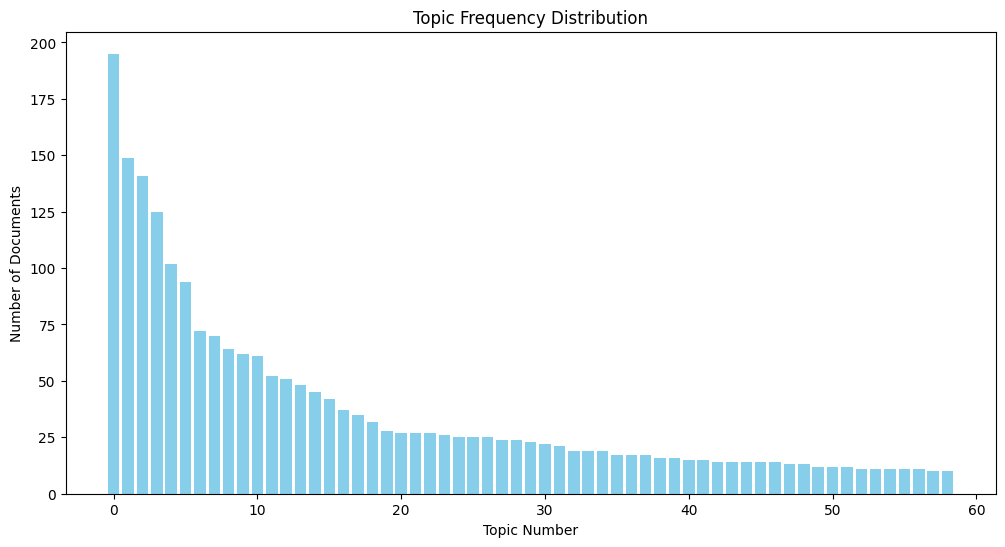

In [24]:
import matplotlib.pyplot as plt

# Get topic frequencies
topic_freq = bert_topic.get_topic_freq()
topic_freq = topic_freq[topic_freq.Topic != -1]  # Exclude outliers (-1 topic)

# Plot topic frequency distribution
plt.figure(figsize=(12, 6))
plt.bar(topic_freq['Topic'], topic_freq['Count'], color='skyblue')
plt.xlabel("Topic Number")
plt.ylabel("Number of Documents")
plt.title("Topic Frequency Distribution")
plt.show()


In [36]:
import matplotlib.pyplot as plt

# Generate and display the topic similarity plot (2D projection)
fig = bert_topic.visualize_topics()
fig.show() 

In [44]:
# make hierarchical topic visualization
fig = bert_topic.visualize_hierarchy()
fig.show()


Use GPT to assign labels

Here are suggested labels for each topic:

1. **Company Earnings and Analyst Ratings**
2. **Investment Funds and Stock Market**
3. **Autonomous Vehicles and Self-Driving Technology**
4. **Stock Market Indices and Movement**
5. **US-China Trade Relations and Tariffs**
6. **Quarterly Revenue and Financial Results**
7. **High Volume Stock Trading Sessions**
8. **Stock Target Prices and Analyst Ratings**
9. **Market Performance and Top Movers**
10. **Apple's Products and Services Revenue**
11. **Stock Resistance and Support Levels**
12. **Market Speculation and Economic Outlook**
13. **Semiconductor Industry Overview**
14. **Cloud Storage and Data Solutions**
15. **Commodities and Precious Metals**
16. **Machine Learning and AI Solutions**
17. **China and Semiconductor Trade**
18. **Oil Prices and Inflation Impact**
19. **Antitrust and Legal Cases in Tech**
20. **Micron and Semiconductor Demand**
21. **Earnings Surprises and Market Reactions**
22. **Trading Strategies and Technical Analysis**
23. **Gaming Industry and Revenue Streams**
24. **Quarterly Earnings and Stock Performance**
25. **Micron and Memory Chip Market**
26. **Global Chip Demand and Revenue**
27. **Company Stock Movements and Forecasts**
28. **Healthcare and Pharmaceutical Stocks**
29. **Revenue and Stock Market Downturns**
30. **Revenue Growth and Analyst Insights**
31. **Earnings Reports and Market Beat/Miss**
32. **Oil and Commodities Market Forecasts**
33. **Graphics Cards and Gaming Hardware**
34. **AI and Chip Technology in Data Centers**
35. **Social Media Platforms and User Engagement**
36. **Cryptocurrency Mining and Market Impact**
37. **Digital Currency and Blockchain Transactions**
38. **Portfolio Management and Trading Recommendations**
39. **Tech Stocks and Market Movements**
40. **Market Updates and Investor Insights**
41. **Gaming and Streaming Services**
42. **Gaming Company Financials**
43. **Market Indexes and Economic Indicators**
44. **Semiconductor Industry Growth**
45. **Earnings Season and Stock Index Performance**
46. **Electronic Design and Verification**
47. **Stock Valuation Ratios and Metrics**
48. **Graphics and Microprocessor Competition**
49. **US-China Trade Exposure**
50. **Gaming Hardware and Performance**
51. **Stock Resistance and Market Levels**
52. **Yearly Stock Performance and Company Cost**
53. **Political Events and Market Impact**
54. **Corporate Financial Offerings and Capital**
55. **Earnings Revisions and Performance Scores**
56. **Processor Sales and Semiconductor Revenue**
57. **Smart Home and Voice Assistants**
58. **Market Closing and Sentiment Analysis**

These labels summarize the focus of each topic for easy reference.